# Telco Retention Strategy
Customer churn leads to recurring revenue loss in telecom companies. This project focuses on identifying high-risk customers and key churn drivers to support targeted and cost-effective retention actions.

## Objectives
- Identify customers with high churn risk.
- Understand churn drivers that are actionable.
- Support prioritization for retention efforts.

## Dataset
**Source**: [Telco Customer Churn Dataset](https://www.kaggle.com/datasets/blastchar/telco-customer-churn)

## Features
- Customer demographics (gender, senior citizen, etc.).
- Account details (tenure, contract type, payment method).
- Service usage (monthly charges, total charges, etc.).
- Target variable: **Churn (Yes/No)**.

# Setup & Configuration

In [1]:
# Standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data handling
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# ML/Modeling
from sklearn.ensemble import RandomForestClassifier

# Configuration
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
sns.set_style("whitegrid")

# Global Variables (Path data, Random State)
SEED = 42
DATA_PATH = "/content/Telco-Customer-Churn.csv"

# Data Inspection & Cleaning


In [2]:
df = pd.read_csv(DATA_PATH)

print(f"Dataset Shape: {df.shape}")
print(f"Missing Values: {df.isna().sum().sum()}")
print(f"Duplicates: {df.duplicated().sum()}")
display(df.head())

Dataset Shape: (7043, 21)
Missing Values: 0
Duplicates: 0


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


TotalCharges has wrong data type, convert it to numeric values.

In [4]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [5]:
df.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [6]:
df[df['TotalCharges'].isna()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


Missing TotalCharges values correspond to customers with zero tenure that is indicate no billing history. These values were imputed as zero.

In [7]:
df['TotalCharges'] = df['TotalCharges'].fillna(0)

In [8]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


# Data-Driven Prioritization

<Axes: title={'center': 'Feature Importance (Mutual Info)'}>

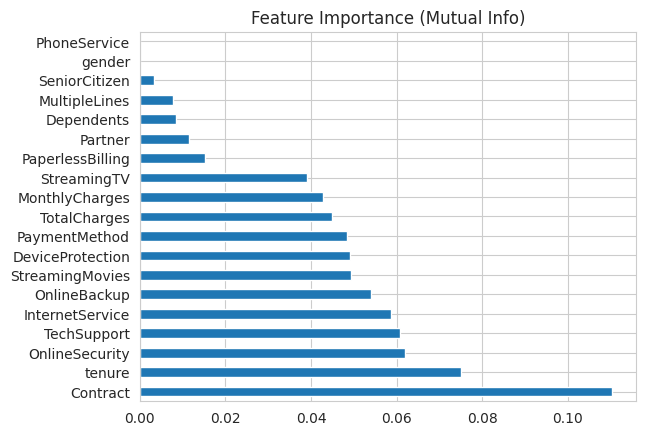

In [9]:
df_screen = df.drop(columns=['customerID']).copy()
for col in df_screen.select_dtypes(include='object').columns:
    df_screen[col] = LabelEncoder().fit_transform(df_screen[col])

X = df_screen.drop('Churn', axis=1)
y = df_screen['Churn']

importances = mutual_info_classif(X, y)
feat_importances = pd.Series(importances, index=X.columns)
feat_importances.sort_values(ascending=False).plot(kind='barh', title='Feature Importance (Mutual Info)')

# Exploratory Data Analysis

1.   What is the financial impact of the current churn rate on the company's annual revenue?
2.   How does contract duration influence the likelihood of customer churn?
3.   Does the type of internet service affect customer retention rates differently?
4.   Do customers who subscribe to additional services like Tech Support or Online Security show lower churn rates?
5.   Are we losing high-spending customers more frequently than low-spending ones?




## Revenue Impact

Churn Rate: 26.54%
Monthly Loss: $139,130.85
Annual Loss (Revenue Hemorrhage): $1,669,570.20


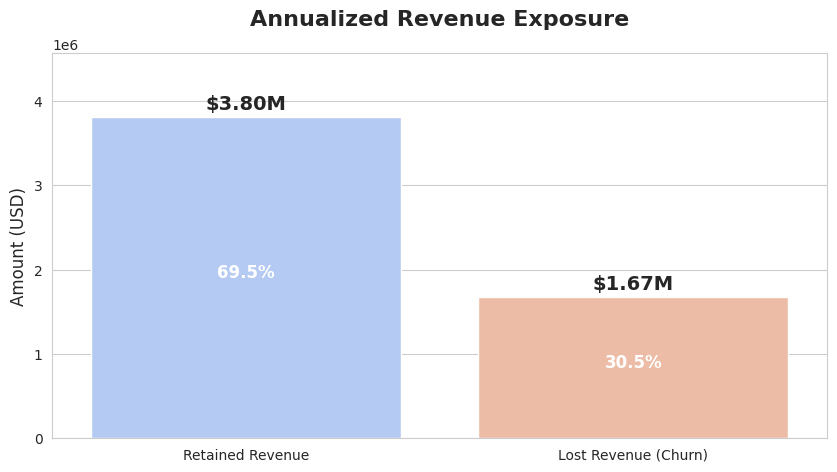

In [10]:
churners = df[df['Churn'] == 'Yes']
churn_rate = churners.shape[0] / df.shape[0]
monthly_loss = churners['MonthlyCharges'].sum()
annual_loss = monthly_loss * 12

print(f"Churn Rate: {churn_rate:.2%}")
print(f"Monthly Loss: ${monthly_loss:,.2f}")
print(f"Annual Loss (Revenue Hemorrhage): ${annual_loss:,.2f}")

churn_loss = df[df['Churn']=='Yes']['MonthlyCharges'].sum() * 12
retained_rev = df[df['Churn']=='No']['MonthlyCharges'].sum() * 12

plt.figure(figsize=(10, 5))
ax = sns.barplot(x=['Retained Revenue', 'Lost Revenue (Churn)'], y=[retained_rev, churn_loss], palette='coolwarm')

plt.title('Annualized Revenue Exposure', fontsize=16, fontweight='bold', pad=20)
plt.ylabel('Amount (USD)', fontsize=12)

for i, v in enumerate([retained_rev, churn_loss]):
    ax.text(i, v + 100000, f"${v/1000000:.2f}M", ha='center', fontsize=14, fontweight='bold')
    ax.text(i, v - (v/2), f"{v/(retained_rev+churn_loss):.1%}", ha='center', color='white', fontsize=12, fontweight='bold')

plt.ylim(0, max(retained_rev, churn_loss) * 1.2)
plt.show()

The analysis identifies churn not just as a user metric, but as a major financial risk.

*   The company is losing approximately $1.67 Million USD annually due to customer attrition.
*   This losing represents ~26.5% of the total potential revenue pool.



---



## Contract Analysis

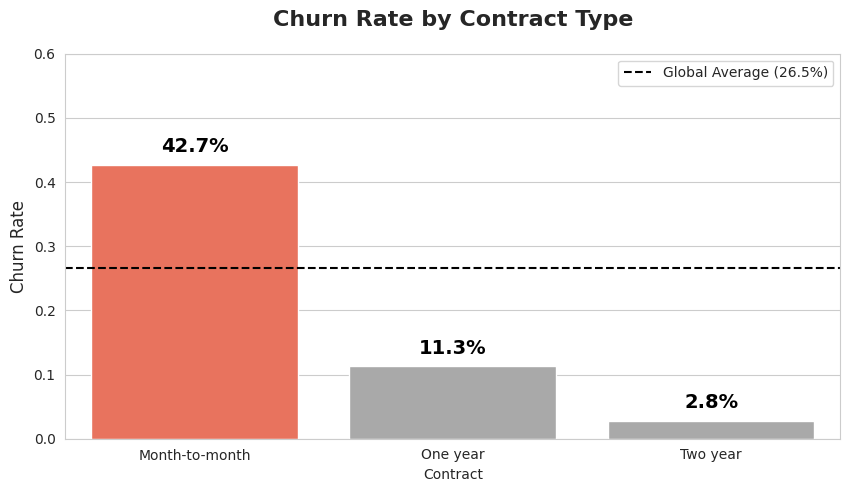

In [11]:
df['Churn_Binary'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

plt.figure(figsize=(10, 5))

contract_churn = df.groupby('Contract')['Churn_Binary'].mean().reset_index()
contract_churn = contract_churn.sort_values('Churn_Binary', ascending=False)

ax = sns.barplot(data=contract_churn, x='Contract', y='Churn_Binary', palette=['tomato', '#A9A9A9', '#A9A9A9'])

plt.title('Churn Rate by Contract Type', fontsize=16, fontweight='bold', pad=20)
plt.ylabel('Churn Rate', fontsize=12)
plt.ylim(0, 0.6)

for index, row in contract_churn.iterrows():
    ax.text(index, row.Churn_Binary + 0.02, f"{row.Churn_Binary:.1%}", ha='center', fontsize=14, fontweight='bold', color='black')

plt.axhline(y=df['Churn_Binary'].mean(), color='black', linestyle='--', label='Global Average (26.5%)')
plt.legend()
plt.show()

Short-term contracts are the primary driver of customer exit.

*   Customers on Month-to-Month contracts have a churn rate of 42.7%.
*   In contrast, Two-Year contract holders have a negligible churn rate of 2.8%.



---



## Product Quality

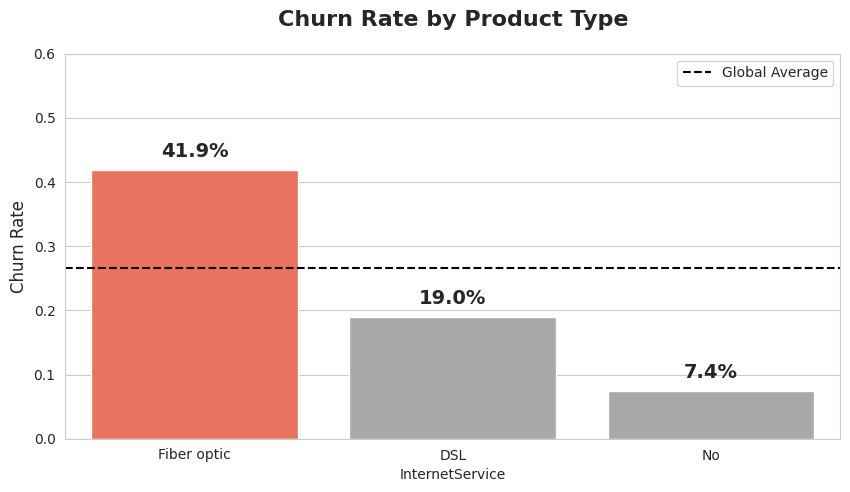

In [12]:
plt.figure(figsize=(10, 5))

internet_churn = df.groupby('InternetService')['Churn_Binary'].mean().reset_index()
internet_churn = internet_churn.sort_values('Churn_Binary', ascending=False).reset_index()

ax = sns.barplot(data=internet_churn, x='InternetService', y='Churn_Binary', palette=['tomato', '#A9A9A9', '#A9A9A9']) # Highlight Fiber

plt.title('Churn Rate by Product Type', fontsize=16, fontweight='bold', pad=20)
plt.ylabel('Churn Rate', fontsize=12)
plt.ylim(0, 0.6)

for index, row in internet_churn.iterrows():
    ax.text(index, row.Churn_Binary + 0.02, f"{row.Churn_Binary:.1%}", ha='center', fontsize=14, fontweight='bold')

plt.axhline(y=df['Churn_Binary'].mean(), color='black', linestyle='--', label='Global Average')
plt.legend()
plt.show()

Our flagship premium product is underperforming in retention. Fiber Optic users churn at a rate of 41.9%, significantly higher than DSL users (19.0%).



---



## Service Ecosystem

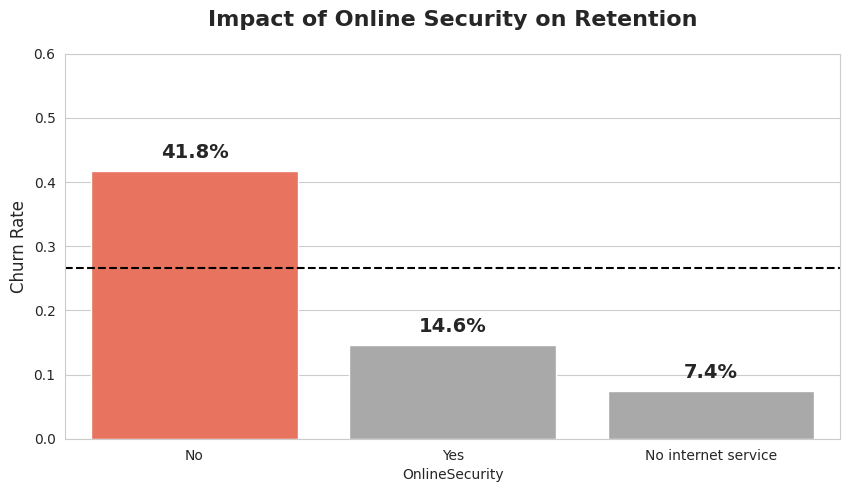

In [13]:
plt.figure(figsize=(10, 5))

online_security_churn = df.groupby('OnlineSecurity')['Churn_Binary'].mean().reset_index()
online_security_churn = online_security_churn.sort_values('Churn_Binary', ascending=False).reset_index()

ax = sns.barplot(data=online_security_churn, x='OnlineSecurity', y='Churn_Binary', palette=['tomato', '#A9A9A9', '#A9A9A9'])

plt.title('Impact of Online Security on Retention', fontsize=16, fontweight='bold', pad=20)
plt.ylabel('Churn Rate', fontsize=12)
plt.ylim(0, 0.6)
plt.axhline(y=df['Churn_Binary'].mean(), color='black', linestyle='--', label='Global Average')

for index, row in online_security_churn.iterrows():
    ax.text(index, row.Churn_Binary + 0.02, f"{row.Churn_Binary:.1%}", ha='center', fontsize=14, fontweight='bold')

plt.show()

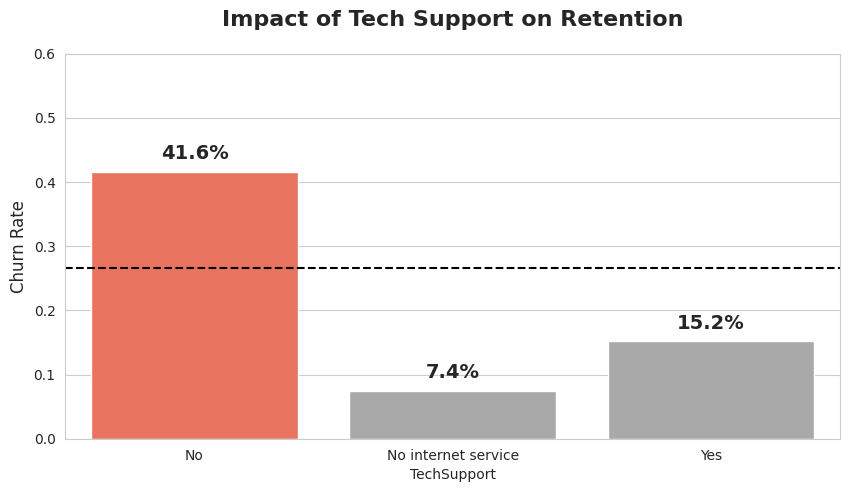

In [14]:
plt.figure(figsize=(10, 5))

tech_churn = df.groupby('TechSupport')['Churn_Binary'].mean().reset_index()
tech_churn['order'] = tech_churn['TechSupport'].map({'No': 0, 'Yes': 2, 'No internet service': 1})
tech_churn = tech_churn.sort_values('order')

ax = sns.barplot(data=tech_churn, x='TechSupport', y='Churn_Binary', palette=['tomato', '#A9A9A9', '#A9A9A9'])

plt.axhline(y=df['Churn_Binary'].mean(), color='black', linestyle='--', label='Global Average')
plt.title('Impact of Tech Support on Retention', fontsize=16, fontweight='bold', pad=20)
plt.ylabel('Churn Rate', fontsize=12)
plt.ylim(0, 0.6)

for i, row in enumerate(tech_churn.itertuples()):
    ax.text(i, row.Churn_Binary + 0.02, f"{row.Churn_Binary:.1%}", ha='center', fontsize=14, fontweight='bold')

plt.show()

Value-added services act as effective exit barriers.

*   Customers without Online Security churn at 41.8%, while those with Online Security churn at only 14.6%.
*   Tech Support shows a similar protective effect.



---



## Vulnerability Profiling

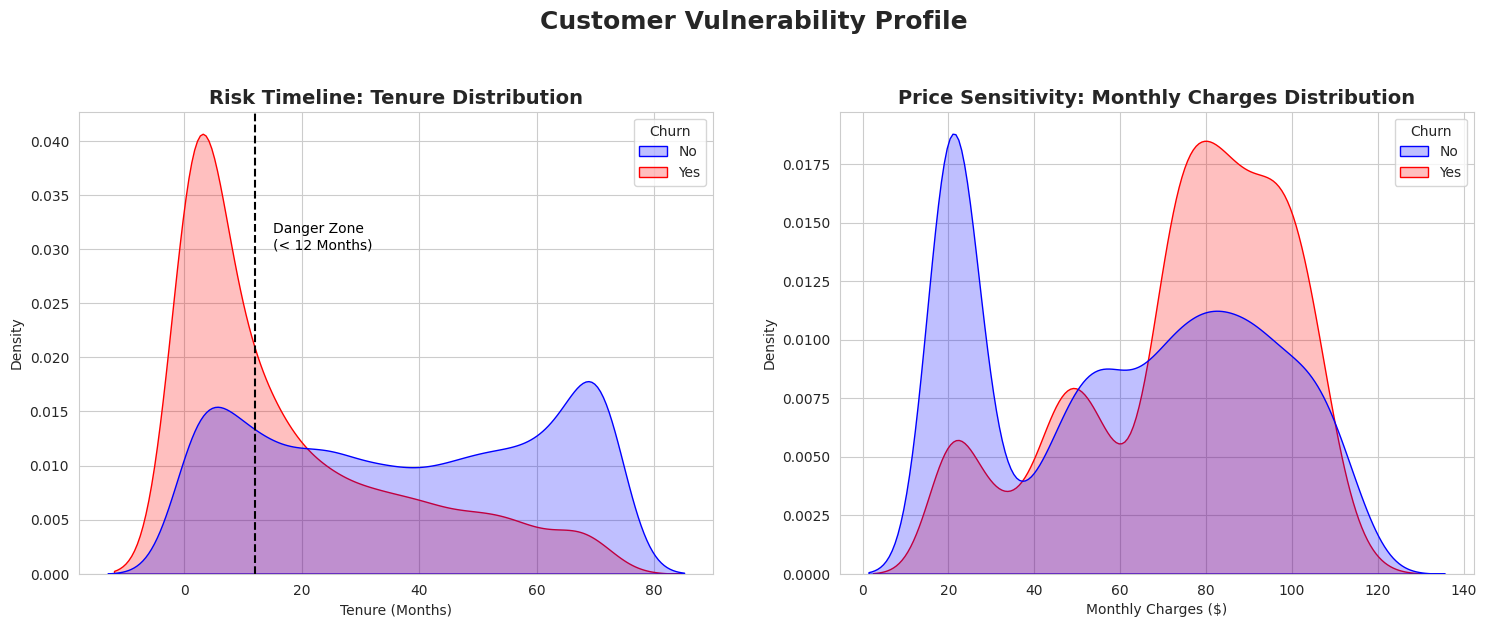

In [15]:
palette = {'Yes': 'red', 'No': 'blue'}

fig, ax = plt.subplots(1, 2, figsize=(18, 6))

sns.kdeplot(data=df, x='tenure', hue='Churn', fill=True, palette=palette, ax=ax[0], common_norm=False)
ax[0].set_title('Risk Timeline: Tenure Distribution', fontsize=14, fontweight='bold')
ax[0].set_xlabel('Tenure (Months)')
ax[0].axvline(x=12, color='black', linestyle='--')
ax[0].text(15, 0.03, 'Danger Zone\n(< 12 Months)', color='black')

sns.kdeplot(data=df, x='MonthlyCharges', hue='Churn', fill=True, palette=palette, ax=ax[1], common_norm=False)
ax[1].set_title('Price Sensitivity: Monthly Charges Distribution', fontsize=14, fontweight='bold')
ax[1].set_xlabel('Monthly Charges ($)')

plt.suptitle('Customer Vulnerability Profile', fontsize=18, fontweight='bold', y=1.05)
plt.show()

We are bleeding our most profitable customers early in their lifecycle.


*   The KDE plot (Left) shows a massive spike in churn during Months 0-12. If a customer survives the first year, their loyalty increases drastically.
*   The KDE plot (Right) reveals that churners have higher monthly charges (Peak at ~70-100) compared to retained users.



---



# Feature Engineering

customerID was excluded from modeling features as it does not carry predictive information.

In [16]:
df_clean = df.drop(columns=['customerID'])
df_clean['Churn'] = df_clean['Churn'].map({'Yes': 1, 'No': 0})

In [17]:
# One-Hot Encoding
categorical_cols = [column for column in df_clean.columns if df_clean[column].dtype == 'object' and column != 'Churn']
df_processed = pd.get_dummies(df_clean, columns=categorical_cols, drop_first=False)

In [18]:
scaler = StandardScaler()
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
df_processed[num_cols] = scaler.fit_transform(df_processed[num_cols])

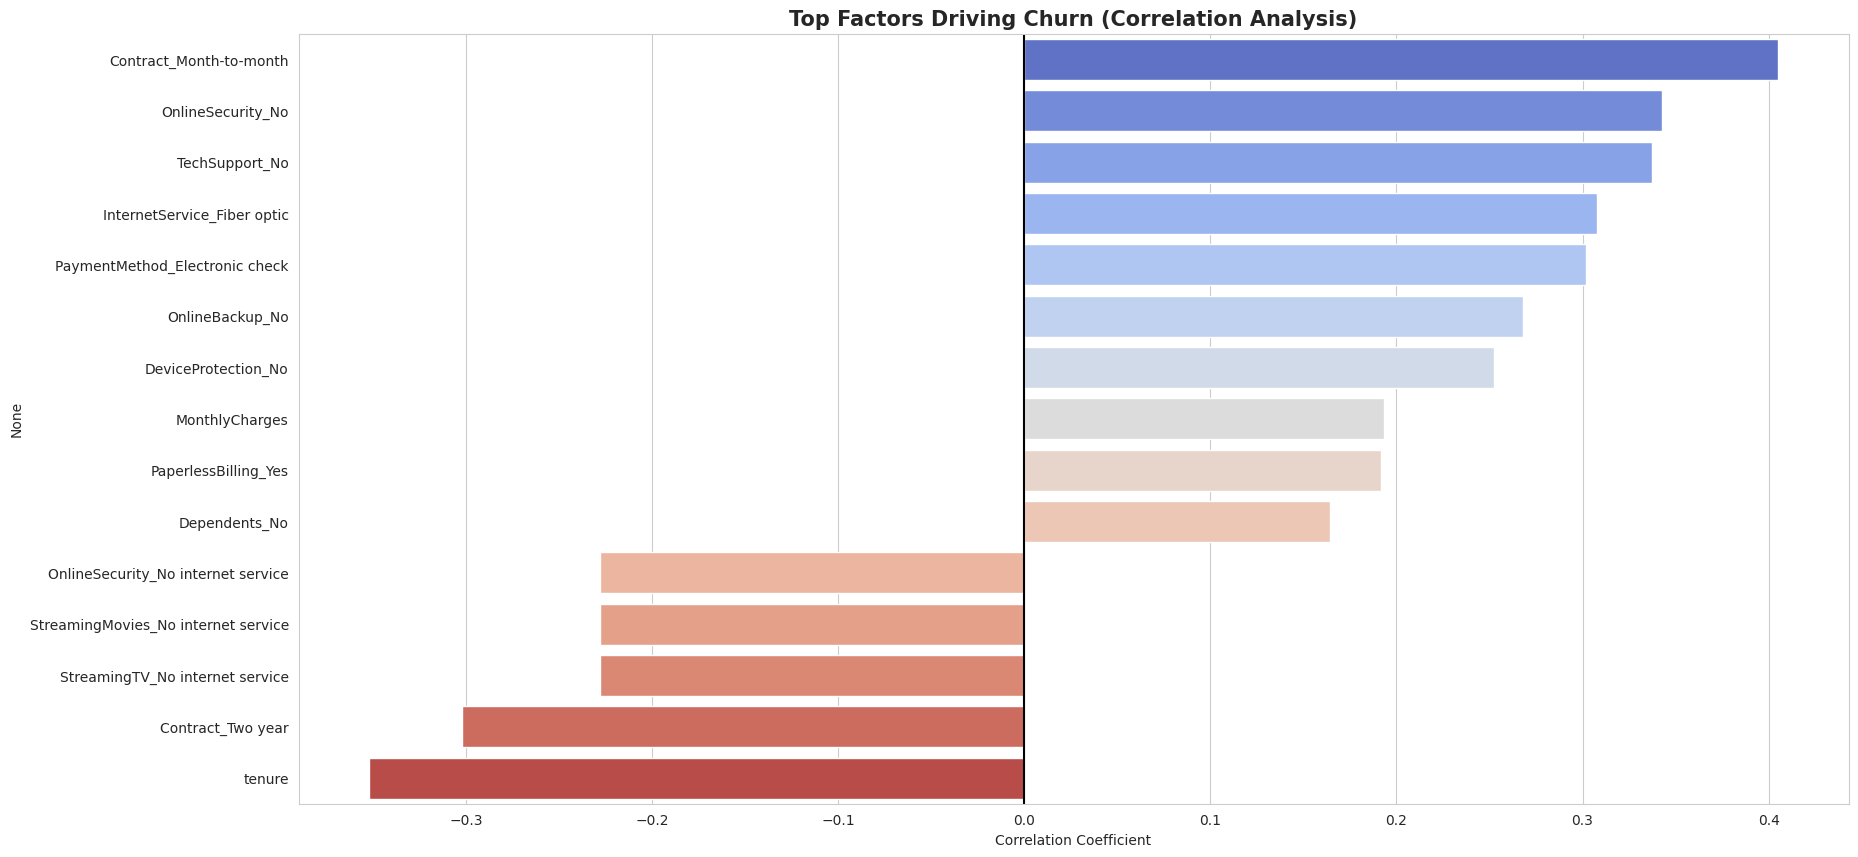

In [19]:
plt.figure(figsize=(20, 10))
corr_with_churn = df_processed.corr()['Churn'].sort_values(ascending=False)
corr_with_churn = corr_with_churn.drop('Churn').drop('Churn_Binary')

top_positive = corr_with_churn.head(10)
top_negative = corr_with_churn.tail(5)
corr_summary = pd.concat([top_positive, top_negative])

sns.barplot(x=corr_summary.values, y=corr_summary.index, palette='coolwarm')
plt.title('Top Factors Driving Churn (Correlation Analysis)', fontsize=15, fontweight='bold')
plt.xlabel('Correlation Coefficient')
plt.axvline(x=0, color='black', linestyle='-')
plt.show()

In [20]:
# Top Positive & Negative Correlations
print("Top 5 Positive Correlations (Bikin Churn):")
print(corr_with_churn.head(5))
print("\nTop 5 Negative Correlations (Bikin Stay):")
print(corr_with_churn.tail(5))

Top 5 Positive Correlations (Bikin Churn):
Contract_Month-to-month           0.405103
OnlineSecurity_No                 0.342637
TechSupport_No                    0.337281
InternetService_Fiber optic       0.308020
PaymentMethod_Electronic check    0.301919
Name: Churn, dtype: float64

Top 5 Negative Correlations (Bikin Stay):
OnlineSecurity_No internet service    -0.227890
StreamingMovies_No internet service   -0.227890
StreamingTV_No internet service       -0.227890
Contract_Two year                     -0.302253
tenure                                -0.352229
Name: Churn, dtype: float64


# Modeling & Evaluation

In [21]:
df_model = pd.get_dummies(df_clean, columns=categorical_cols, drop_first=True)
scaler = StandardScaler()
df_model[num_cols] = scaler.fit_transform(df_model[num_cols])

In [22]:
X = df_model.drop('Churn', axis=1).drop('Churn_Binary', axis=1)
y = df_model['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED, stratify=y)
print(f"Original Train shape: {X_train.shape}")
print(f"Churn Ratio in Train: {y_train.mean():.2%}")

Original Train shape: (5634, 30)
Churn Ratio in Train: 26.54%


In [23]:
smote = SMOTE(random_state=SEED)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
print(f"SMOTE Train shape: {X_train_smote.shape}")
print(f"Churn Ratio after SMOTE: {y_train_smote.mean():.2%}")

SMOTE Train shape: (8278, 30)
Churn Ratio after SMOTE: 50.00%


In [24]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=SEED)
rf_model.fit(X_train_smote, y_train_smote)

RandomForestClassifier(random_state=42)

In [25]:
y_pred = rf_model.predict(X_test)


--- CONFUSION MATRIX ---


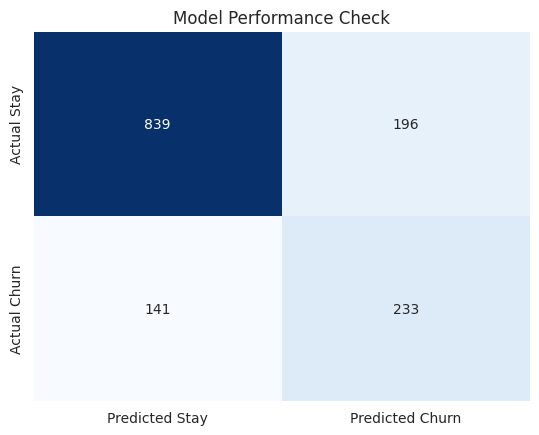


--- CLASSIFICATION REPORT ---
              precision    recall  f1-score   support

           0       0.86      0.81      0.83      1035
           1       0.54      0.62      0.58       374

    accuracy                           0.76      1409
   macro avg       0.70      0.72      0.71      1409
weighted avg       0.77      0.76      0.77      1409



In [26]:
print("\n--- CONFUSION MATRIX ---")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Stay', 'Predicted Churn'],
            yticklabels=['Actual Stay', 'Actual Churn'])
plt.title('Model Performance Check')
plt.show()

print("\n--- CLASSIFICATION REPORT ---")
print(classification_report(y_test, y_pred))

# Conclusion & Recommendations

In [27]:
# --- BUSINESS SIMULATION: ROI CALCULATION ---
avg_monthly_revenue = df_clean['MonthlyCharges'].mean()
clv_multiplier = 12
avg_clv = avg_monthly_revenue * clv_multiplier

retention_cost = 65
retention_success_rate = 0.5

cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

print(f"--- ROI & IMPACT ANALYSIS ---")
print(f"Business Assumption: Avg Revenue ${avg_monthly_revenue:.2f}/mo, Cost ${retention_cost}, Success Rate {retention_success_rate:.0%}")
print("-" * 30)

loss_no_model = (tp + fn) * avg_clv
print(f"1. STRATEGY: DO NOTHING")
print(f"   Potential Loss: ${loss_no_model:,.0f} (Total Revenue at Risk)")

total_test_users = tp + fp + fn + tn
cost_mass = total_test_users * retention_cost
saved_mass = (tp + fn) * avg_clv * retention_success_rate
net_mass = saved_mass - cost_mass
print(f"2. STRATEGY: MASS CAMPAIGN")
print(f"   Cost: ${cost_mass:,.0f}")
print(f"   Net Profit: ${net_mass:,.0f}")

cost_ml = (tp + fp) * retention_cost
saved_ml = tp * avg_clv * retention_success_rate
net_ml = saved_ml - cost_ml
print(f"3. STRATEGY: ML-DRIVEN (Targeted)")
print(f"   Cost: ${cost_ml:,.0f} (Efficiency Saving)")
print(f"   Net Profit: ${net_ml:,.0f}")

uplift = net_ml - max(0, net_mass)
print("-" * 30)
print(f"EXECUTIVE SUMMARY:")
print(f"Implementing this model generates an estimated EXTRA VALUE of ${uplift:,.0f}.")

--- ROI & IMPACT ANALYSIS ---
Business Assumption: Avg Revenue $64.76/mo, Cost $65, Success Rate 50%
------------------------------
1. STRATEGY: DO NOTHING
   Potential Loss: $290,650 (Total Revenue at Risk)
2. STRATEGY: MASS CAMPAIGN
   Cost: $91,585
   Net Profit: $53,740
3. STRATEGY: ML-DRIVEN (Targeted)
   Cost: $27,885 (Efficiency Saving)
   Net Profit: $62,652
------------------------------
EXECUTIVE SUMMARY:
Implementing this model generates an estimated EXTRA VALUE of $8,912.


## Business Impact
Based on the simulation on the test data, the Random Forest model serves as a highly effective profit-maximization tool.

*   **Risk Identification:** The model successfully captures ~62% of potential churners (Recall).
*   **Financial Uplift:** By shifting from a Mass Marketing strategy to an ML-Targeted strategy, the company can generate Cost Savings (avoiding subsidies for loyal users) and Revenue Protection (saving at-risk users).


---


## Actionable Recommendations
1.   **Immediate Integration:** Deploy the model to the CRM system to flag "High Risk" customers in real-time.
2.   **Intervention Tiering:**
*   **High Value & High Risk:** Offer direct intervention (Personal Call + 1 Year Contract Upgrade).
*   **Low Value & High Risk:** Send automated email offers/discounts.
3.  **Root Cause Fix:** Address the systemic issue with Fiber Optic service quality and incentivize Month-to-month users to switch to annual contracts.


In [28]:
# Save model
import joblib
joblib.dump(rf_model, 'churn_model.pkl')
model_columns = list(X.columns)
joblib.dump(model_columns, 'model_columns.pkl')
joblib.dump(scaler, 'scaler.pkl')
df_clean.to_csv('cleaned_telco_data.csv', index=False)